# PSTAT 134/234 - Histograms and Distributions <a class='tocSkip'>
    
## Sang-Yun Oh <a class='tocSkip'> 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Random-Variables-vs.-Data" data-toc-modified-id="Random-Variables-vs.-Data-1">Random Variables vs. Data</a></span></li><li><span><a href="#Histogram-as-Probability-Functions" data-toc-modified-id="Histogram-as-Probability-Functions-2">Histogram as Probability Functions</a></span><ul class="toc-item"><li><span><a href="#Properties-of-Histograms" data-toc-modified-id="Properties-of-Histograms-2.1">Properties of Histograms</a></span></li><li><span><a href="#Estimating-Probabilities" data-toc-modified-id="Estimating-Probabilities-2.2">Estimating Probabilities</a></span></li><li><span><a href="#Checking-Probabilities" data-toc-modified-id="Checking-Probabilities-2.3">Checking Probabilities</a></span></li><li><span><a href="#Histogram-with-$n$-(nonzero)-bins" data-toc-modified-id="Histogram-with-$n$-(nonzero)-bins-2.4">Histogram with $n$ (nonzero) bins</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.5">Summary</a></span></li></ul></li><li><span><a href="#Resampling-from-Data" data-toc-modified-id="Resampling-from-Data-3">Resampling from Data</a></span><ul class="toc-item"><li><span><a href="#Empirical-CDF" data-toc-modified-id="Empirical-CDF-3.1">Empirical CDF</a></span></li><li><span><a href="#Method-of-Distributions" data-toc-modified-id="Method-of-Distributions-3.2">Method of Distributions</a></span></li><li><span><a href="#Bootstrap-Algorithm" data-toc-modified-id="Bootstrap-Algorithm-3.3">Bootstrap Algorithm</a></span></li><li><span><a href="#Simpler-Bootstrap-Algorithm" data-toc-modified-id="Simpler-Bootstrap-Algorithm-3.4">Simpler Bootstrap Algorithm</a></span></li></ul></li><li><span><a href="#Example:-Loaded-Dice" data-toc-modified-id="Example:-Loaded-Dice-4">Example: Loaded Dice</a></span><ul class="toc-item"><li><span><a href="#Sampling-from-Population" data-toc-modified-id="Sampling-from-Population-4.1">Sampling from Population</a></span></li><li><span><a href="#Resampling-from-Data" data-toc-modified-id="Resampling-from-Data-4.2">Resampling from Data</a></span></li><li><span><a href="#Population,-Random-Sample,-vs.-Random-Resample" data-toc-modified-id="Population,-Random-Sample,-vs.-Random-Resample-4.3">Population, Random Sample, vs. Random Resample</a></span></li><li><span><a href="#Quantifying-Uncertainty" data-toc-modified-id="Quantifying-Uncertainty-4.4">Quantifying Uncertainty</a></span></li></ul></li><li><span><a href="#Resampling-Strategies" data-toc-modified-id="Resampling-Strategies-5">Resampling Strategies</a></span></li><li><span><a href="#Bootstrap-Estimates-of-Bias,-Standard-Deviation,-and-MSE" data-toc-modified-id="Bootstrap-Estimates-of-Bias,-Standard-Deviation,-and-MSE-6">Bootstrap Estimates of Bias, Standard Deviation, and MSE</a></span><ul class="toc-item"><li><span><a href="#Bootstrap-Bias-Estimate" data-toc-modified-id="Bootstrap-Bias-Estimate-6.1">Bootstrap Bias Estimate</a></span></li><li><span><a href="#Bootstrap-Standard-Error" data-toc-modified-id="Bootstrap-Standard-Error-6.2">Bootstrap Standard Error</a></span></li><li><span><a href="#Bootstrap-Mean-Square-Error" data-toc-modified-id="Bootstrap-Mean-Square-Error-6.3">Bootstrap Mean Square Error</a></span></li></ul></li></ul></div>

# Random Variables vs. Data

**Random Variable: $Y$**
- Suppose $Y\sim f(y)$, and $f(y)$ is the **probability density function**
- $f(y)$ analytically defines behavior or $Y$

**Data of $Y$: $y_1, y_2, \dots$**
- Each $y_i$ is one (random) observation of $Y$
- In practice, the **true distribution**, $f(y)$, is not known
- However, we can estimate the **empirical distribution**, $\hat f(y)$, from data
- Histogram $\hat f(y)$ and equivalently its CDF, $\hat F(y)$, is the empirical distribution of $Y$

# Histogram as Probability Functions

True pdf of $N(3,1)$ looks like

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(234)

In [2]:
num_data = 100 # number of observations
num_bins = 20  # number of bins

Y = norm(loc=3, scale=1)
# analytical density function f(y) of Normal(3, 1)
def f(y): 
    return Y.pdf(y)

y_data = Y.rvs(num_data) # made up "data"
y_grid = np.linspace(-2, 8, num=1000) # choose some falues of y

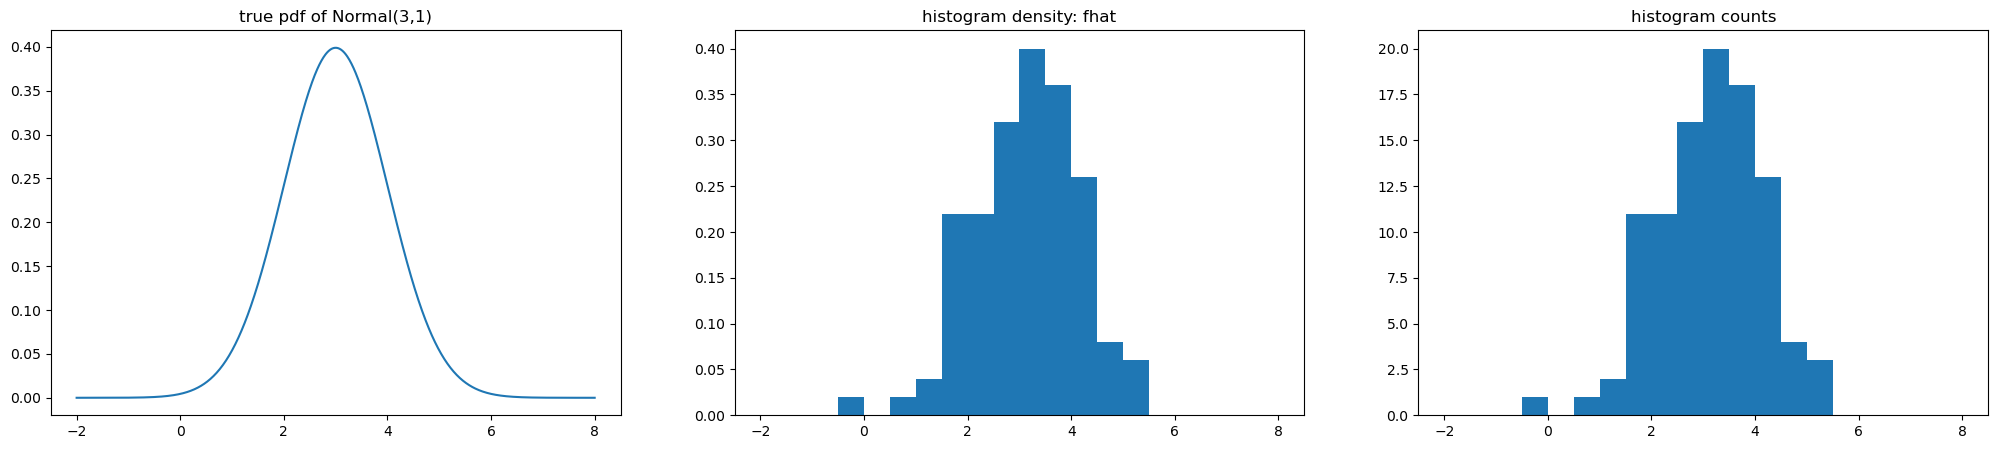

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(25, 5))

ax[0].plot(y_grid, f(y_grid))

bin_edges = np.linspace(-2, 8, num=num_bins+1)
fhat,   bins, patches = ax[1].hist(y_data, density=True,  bins=bin_edges) # density plot
counts, bins, patches = ax[2].hist(y_data, density=False, bins=bin_edges) # counts plot

ax[0].set_title('true pdf of Normal(3,1)'); ax[1].set_title('histogram density: fhat'); ax[2].set_title('histogram counts')
plt.show()

Question: [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) can output continuous or discrete approximation of probability function of a dataset.

A. True

B. False

## Properties of Histograms

In [4]:
assert(len(counts) == num_bins) # check there are indeed `num_bins` of counts
assert(sum(counts) == num_data) # check total counts is equal to `num_data`

In [5]:
sum(fhat) # density does not sum to 1: i.e., cannot be a discrete distribution

2.0

In [6]:
sum(fhat*0.5) # density times bin widths (0.5) adds up to 1

1.0

$\hat f(y)$ (when `density=True`) is a piecewise constant approximation of $f(y)$

## Estimating Probabilities

- $\hat f$ approximates $f$ (continuous pdf)
- What can we compute from histogram counts and density values? 

In [7]:
normalize_fhat  = fhat/sum(fhat)          # heights1: just normalizing fhat (constant bin width)
fhat_delta      = fhat*np.diff(bin_edges) # heights2: approximating integral with constant height per bin
bin_probability = counts/num_data         # heights3: probability of being in bin

In [8]:
assert(all(np.isclose(normalize_fhat, fhat_delta)))  # heights1 is equal to heights2
assert(all(np.isclose(fhat_delta, bin_probability))) # heights2 is equal to heights3

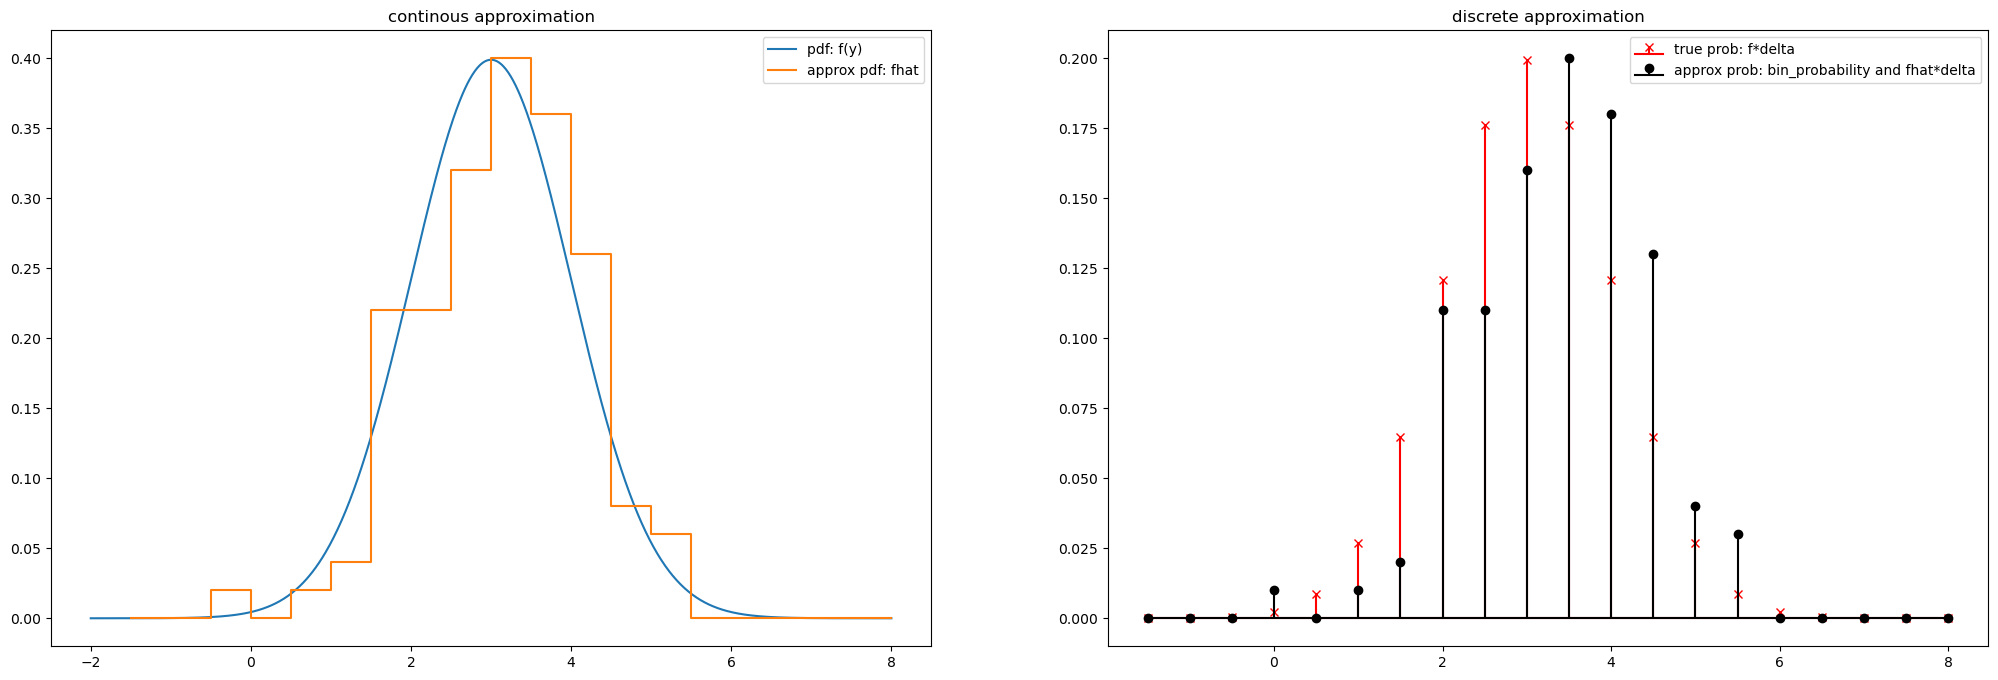

In [9]:
midpoints = bin_edges[:-1] + np.diff(bin_edges)

fig, ax = plt.subplots(1, 2, figsize=(25, 8))

ax[0].plot(y_grid, f(y_grid))                 # true density
ax[0].step(midpoints, fhat)                   # continuous approximation
ax[0].set_title('continous approximation')
ax[0].legend(['pdf: f(y)', 'approx pdf: fhat'])

ax[1].stem(midpoints, f(midpoints)*np.diff(bin_edges), # true probability mass at bin center
           markerfmt='xr', linefmt='r', basefmt='r')
ax[1].stem(midpoints, bin_probability,                 # approximate probability mass at bin center 
           markerfmt='ok', linefmt='k', basefmt='k')
ax[1].set_title('discrete approximation')
ax[1].legend(['true prob: f*delta', 'approx prob: bin_probability and fhat*delta'])

plt.show() 

## Checking Probabilities

- Check if approximations are valid probabilities

In [10]:
np.isclose(sum(fhat_delta), 1)

True

- `bin_probabilities` is a pmf
    $$1 = \sum_{b=1}^B \texttt{bin-probabilities}_b = \sum_{b=1}^B \hat p(x_b)$$

## Histogram with $n$ (nonzero) bins

- Suppose total number of bins $B$ is large

- Each data point $x_i$ has its own histogram bin $i=1,2,\dots,n$ 

- Each histogram bin will have one data point 

- Height of each histogram bin will be $1/n$

- Therefore, $\hat p(x_i) = 1/n$, which implies sample avaerage:
$$\hat E(x) = \frac{1}{n} \sum_{i=1}^n x_i$$

## Summary

- Any distribution can be approximated with a histogram

- Approximation can be continuous or discrete

- $\hat f(y)$ is piecewise constant approximation of continuous pdf (`density=True`)

- $\hat p(y_b)$ is approximate pmf where discrete values are at bin centers 

# Resampling from Data

- Recall our data $y_i$, where $i=1,2,\dots,n$

- How can we "sample from" our empirical distribution that our data represents

- Recall from 120B definition of CDF:
    $$ F(y) = P(Y\leq y) = \int_{-\infty}^y f(z)\, dz $$

In [11]:
def ecdf(data):
    y_ord = np.sort(data)
    n = y_ord.size
    Fhat = np.arange(1, n+1) / n
    
    return y_ord, Fhat

## Empirical CDF 

- Sort data $D$ and let order statistic of $y_i$ be $y_{(i)}$

- We can approximate $F(y)$ with $\hat F(y)$ since
    $$\begin{aligned}
     &\hat P(Y< y_{(1)}) = 0\\
     \hat F(y_{(1)}) = &\hat P(Y\leq y_{(1)}) = 1/n\\
     \hat F(y_{(2)}) = &\hat P(Y\leq y_{(2)}) = 2/n\\
     &\vdots \\         
     \hat F(y_{(n)}) = &\hat P(Y\leq y_{(n)}) = n/n = 1\\
    \end{aligned}$$

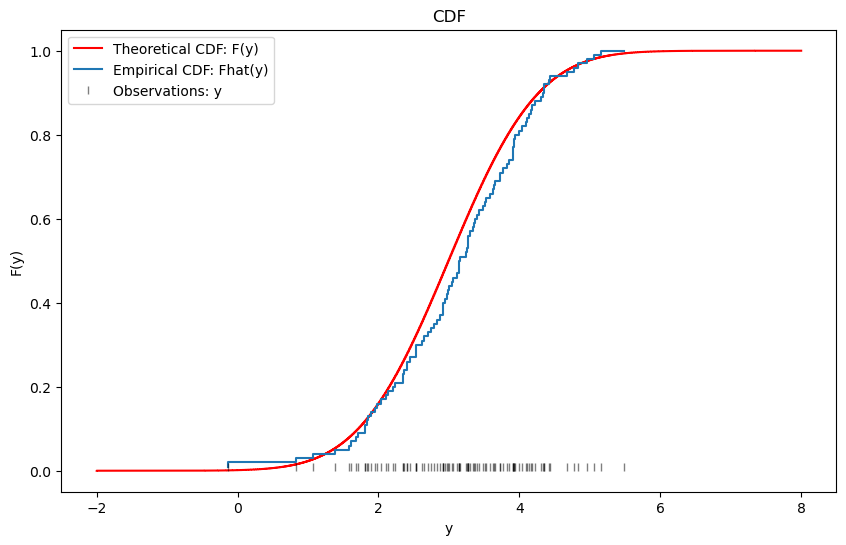

In [12]:
# y_data = Y.rvs(num_data) # new data
y_os, Fhat = ecdf(y_data)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.step(y_grid, Y.cdf(y_grid), '-r')
ax.step(y_os, Fhat, '-')
ax.plot(y_os, [0.01]*len(y_os), '|', color='k', alpha=0.5)

ax.set_title('CDF')
ax.set_xlabel('y')
ax.set_ylabel('F(y)')
ax.legend(['Theoretical CDF: F(y)', 'Empirical CDF: Fhat(y)', 'Observations: y'])
plt.show()

## Method of Distributions

- Simulate "new data" (bootstrap data) with one dataset: $D = \{y_1, y_2, \dots, y_n\}$?

- Can simulate $U\sim\text{Uniform}(0,1)$ and apply some operation $g(U) = Y\sim F(y)$?

- Assume invertible $F$ and non-decreasing $g$, we can show,
    $$g(u) = F^{-1}(u)$$

- $F$ is unknown, but we have $\hat F$ (revisit ECDF)

## Bootstrap Algorithm

Given dataset $D$ with $n$ observations,
1. For $i=1,2,\dots,n$
    1. Sample $u_i$ from Uniform(0,1)
    1. $y_i^* = \hat F^{-1}(u_i)$, 
1. Return $D^* = y^*_1, y^*_2, \dots y^*_n$

## Simpler Bootstrap Algorithm

Given dataset $D$ with $n$ observations,
1. For $i=1,2,\dots,n$
    1. Sample a random integer $i\in [1, n]$
    1. $y^*_i = y_{(i)}$
1. Return $D^* = y^*_1, y^*_2, \dots y^*_n$

![alt text](images/Bootstrap_26_0.png)

In [13]:
def resample_ecdf(data):
    n = len(data)
    resampled_data = np.random.choice(data, len(data))
    return ecdf(resampled_data)

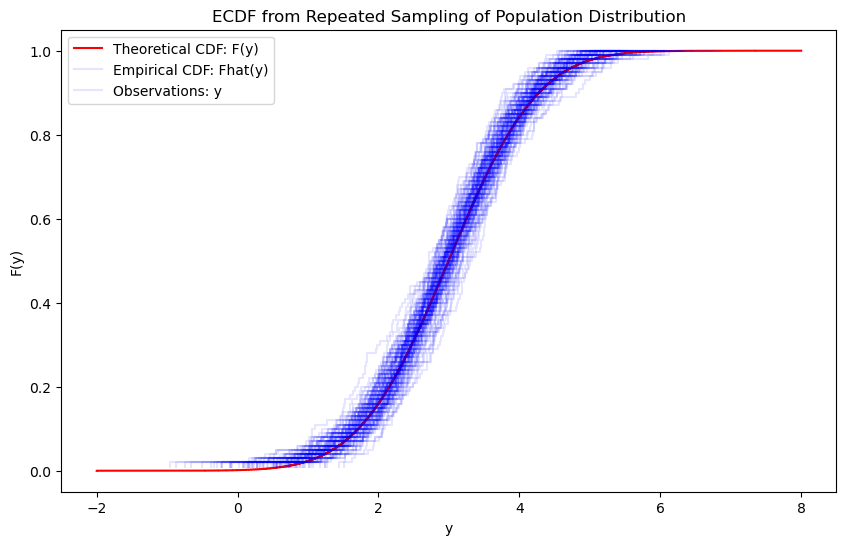

In [14]:
many_independent_ecdfs = [ecdf(Y.rvs(num_data)) for one in range(0, 100)]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.step(y_grid, Y.cdf(y_grid), '-r')
for one_ecdf in many_independent_ecdfs:
    ax.step(*one_ecdf, '-b', alpha=0.1)

ax.set_title('ECDF from Repeated Sampling of Population Distribution')
ax.set_xlabel('y')
ax.set_ylabel('F(y)')
ax.legend(['Theoretical CDF: F(y)', 'Empirical CDF: Fhat(y)', 'Observations: y'])
plt.show()

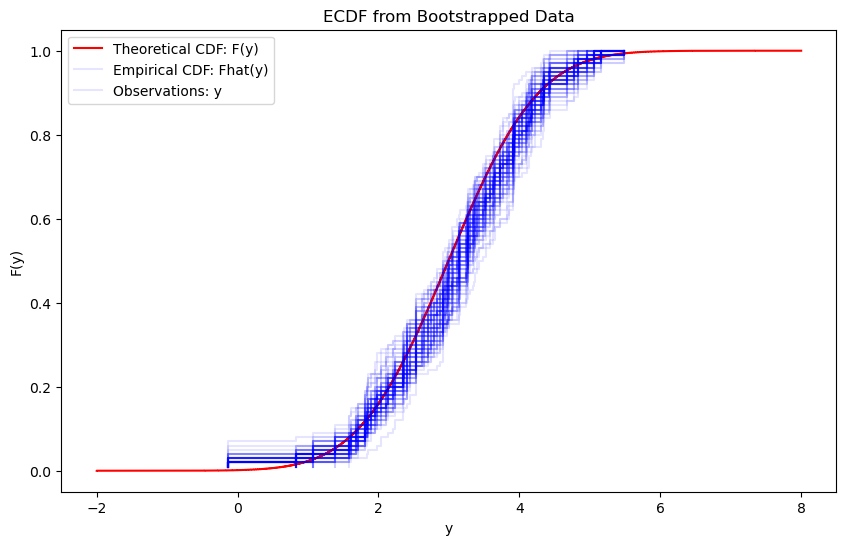

In [15]:
many_resampled_ecdfs = [resample_ecdf(y_data) for one in range(0, 100)]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.step(y_grid, Y.cdf(y_grid), '-r')
for one_ecdf in many_resampled_ecdfs:
    ax.step(*one_ecdf, '-b', alpha=0.1)

ax.set_title('ECDF from Bootstrapped Data')
ax.set_xlabel('y')
ax.set_ylabel('F(y)')
ax.legend(['Theoretical CDF: F(y)', 'Empirical CDF: Fhat(y)', 'Observations: y'])
plt.show()

- Strange group of age between 0 and 10 years old

# Bootstrap Theory

Suppose we draw an iid sample $Y_1, Y_2, \dots Y_B$ from a distribution $G$. By the law of large numbers

$$
\bar{Y}=\frac{1}{B} \sum_{j=1}^B Y_j \stackrel{\mathrm{P}}{\longrightarrow} \int y d G(y)=\mathbb{E}(Y)
$$

as $B\rightarrow \infty$. More generally, if $h$ is any function with finite mean then

$$
\frac{1}{B} \sum_{j=1}^B h\left(Y_j\right) \stackrel{\mathrm{P}}{\longrightarrow} \int h(y) d G(y)=\mathbb{E}(h(Y))
$$



## Example: Variance

Let $h$ be sample variance:
$$
\begin{aligned}
\frac{1}{B} \sum_{j=1}^B\left(Y_j-\bar{Y}\right)^2 & =\frac{1}{B} \sum_{j=1}^B Y_j^2-\left(\frac{1}{B} \sum_{j=1}^B Y_j\right)^2 \\
& \stackrel{\mathrm{P}}{\longrightarrow} \int y^2 d F(y)-\left(\int y d F(y)\right)^2=\mathbb{V}(Y) .
\end{aligned}
$$
We can use sample variance of simulated values to approximate variance of $Y$. 

## Other Statistical Estimators

We can approximate $\mathbb{V}_{\widehat{F}_n}\left(T_n\right)$ by simulation for some estimator $T_n$.

* Real world: $F \Longrightarrow X_1, \ldots, X_n \Longrightarrow T_n=g\left(X_1, \ldots, X_n\right)$
* Bootstrap world: $\widehat{F}_n \Longrightarrow X_1^*, \ldots, X_n^* \Longrightarrow T_n^*=g\left(X_1^*, \ldots, X_n^*\right)$

## Bootstrap Variance Estimation

1. Draw $X_1^*, \ldots, X_n^* \sim \widehat{F}_n$.
2. Compute $T_n^*=g\left(X_1^*, \ldots, X_n^*\right)$.
3. Repeat steps 1 and 2, $B$ times, to get $T_{n, 1}^*, \ldots, T_{n, B}^*$.
4. Let
$$
v_{\mathrm{boot}}=\frac{1}{B} \sum_{b=1}^B\left(T_{n, b}^*-\frac{1}{B} \sum_{r=1}^B T_{n, r}^*\right)^2
$$

## Bootstrap Variance Estimation

* What we want is $\mathbb{V}_F\left(T_n\right)$
* We don't know $F$ but we have an estimate of $\hat F$
* $v_{\text{boot}}$ is an estimate of $\mathbb{V}_{\widehat{F}_n}\left(T_n\right)$

$$
\mathbb{V}_F\left(T_n\right) \overbrace{\approx}^{\text {not so small }} \mathbb{V}_{\widehat{F}_n}\left(T_n\right) \overbrace{\approx}^{\text {small }} v_{\text {boot }} .
$$

## Bootstrap Confidence Intervals

Let $\theta = T(F)$ and $\hat\theta = T(\hat F)$:

* Normal interval: if $\hat\theta$ is close to normal, 
$$\begin{aligned}
\widehat\theta_n \pm z_{\alpha / 2} {\operatorname{se}}_{\text {boot }}
\end{aligned}$$

* Pivotal interval 
$$\begin{aligned}
C_n=\left(2 \widehat{\theta}_n-\widehat{\theta}_{1-\alpha / 2}^*, 2 \widehat{\theta}_n-\widehat{\theta}_{\alpha / 2}^*\right) \text {. }
\end{aligned}$$

* Percentile interval 
$$\begin{aligned}
C_n=\left(\widehat{\theta}_{\alpha / 2}^*, \widehat{\theta}_{1-\alpha / 2}^*\right) \text {. }
\end{aligned}$$

# Example: Loaded Dice

In this section, we simulate such situation. There is some loaded dice with pmf as follows:

|Outcome: $x$   |1     |2     |3     |4     |5     |6     |
|------------   |---   |---   |---   |---   |---   |---   |
|$${\Pr(X=x)}$$ |1/12  |2/12  |2/12  |2/12  |2/12  |3/12  |

Function for throwing such dice can be written as follows:

In [16]:
def throw_loaded_dice(n=1):
    from numpy.random import choice
    
    d = [1, 2,2, 3,3, 4,4, 5,5, 6,6,6]
    return(choice(d, n, replace=True))

## Sampling from Population

* `d` represents 12 dice throws, getting one of 1, two of 2, 3 exactly twice, $\dots$, three of 6

* Equivalently, $\Pr(X=x)$:

|Outcome: $x$   |1     |2     |3     |4     |5     |6     |
|------------   |---   |---   |---   |---   |---   |---   |
|$${\Pr(X=x)}$$ |1/12  |2/12  |2/12  |2/12  |2/12  |3/12  |

* Now, 'throw' this dice 1,000 times:

In [17]:
data = throw_loaded_dice(1000)

## Resampling from Data

* We may not have the real dice; however, we recorded 1,000 dice throws.

* We can _resample with replacement_ from the data

* Data is our _empirical dice_

In [18]:
def choose_from_data(n=1, data_in=None):
    from numpy.random import choice
    
    return(choice(data_in, n, replace=True))

## Resampling from Data <a class="tocSkip">

Let's resample from `data` with replacement:

In [19]:
pseudo_data = choose_from_data(1000, data)

## Population, Random Sample, vs. Random Resample

In [20]:
outcome, data_counts = np.unique(data, return_counts=True)
outcome, resample_counts = np.unique(pseudo_data, return_counts=True)

In [21]:
import pandas as pd

pmfs = pd.DataFrame({
    'outcome': np.arange(1, 7),
    'Population': np.array([1, 2, 2, 2, 2, 3])/12,
    'Sample': data_counts/sum(data_counts),
    'Resample': resample_counts/sum(resample_counts),
}, columns=['outcome','Population','Sample','Resample'])

pmfs

,outcome,Population,Sample,Resample
0,1,0.083333,0.091,0.084
1,2,0.166667,0.186,0.185
2,3,0.166667,0.151,0.144
3,4,0.166667,0.179,0.176
4,5,0.166667,0.163,0.176
5,6,0.250000,0.230,0.235


## Quantifying Uncertainty

* One dataset (random sample) is not enough to characterize uncertainty empirically  
    e.g. characterizing variability of polls need many polls (often not possible)

* Characterizing variability/uncertainty can be easily done with resampling:  
    e.g. what is the variability of proportions?


In [22]:
repeat_resampling = []

for one in range(0, 100):
    
    pseudo_data = choose_from_data(1000, data) # resample from `data`
    outcome, resample_counts = np.unique(pseudo_data, return_counts=True) # count occurrences
    
    repeat_resampling += [resample_counts.tolist()]
    
repeat_resampling = np.array(repeat_resampling)/1000
repeat_resampling[:10]

array([[0.084, 0.186, 0.145, 0.192, 0.17 , 0.223],
       [0.081, 0.196, 0.162, 0.169, 0.168, 0.224],
       [0.075, 0.165, 0.161, 0.179, 0.183, 0.237],
       [0.08 , 0.191, 0.165, 0.187, 0.173, 0.204],
       [0.093, 0.193, 0.137, 0.189, 0.173, 0.215],
       [0.098, 0.177, 0.128, 0.187, 0.179, 0.231],
       [0.104, 0.184, 0.16 , 0.171, 0.137, 0.244],
       [0.094, 0.159, 0.168, 0.194, 0.157, 0.228],
       [0.076, 0.18 , 0.161, 0.194, 0.161, 0.228],
       [0.091, 0.169, 0.157, 0.167, 0.171, 0.245]])

In [23]:
uncertainty = np.std(repeat_resampling, 0)
pmfs['Resample-low'] = pmfs['Resample'] - uncertainty
pmfs['Resample-high'] = pmfs['Resample'] + uncertainty
pmfs

,outcome,Population,Sample,Resample,Resample-low,Resample-high
0,1,0.083333,0.091,0.084,0.074948,0.093052
1,2,0.166667,0.186,0.185,0.172137,0.197863
2,3,0.166667,0.151,0.144,0.132795,0.155205
3,4,0.166667,0.179,0.176,0.164288,0.187712
4,5,0.166667,0.163,0.176,0.164623,0.187377
5,6,0.250000,0.230,0.235,0.221699,0.248301


# Resampling Strategies

* Bootstrap is loose term for resampling

* Two commonly used resampling types are,
    * Model-free resampling (non-parametric bootstrap)
    * Model-based resampling (parametric bootstrap)

* **Model-free resampling**:  
    Randomly draw observations from data with replacement

* **Model-based resampling**:
    1. When data is (assumed) from population distribution, $f(y\mid\theta)$,
    2. Estimate $\hat\theta$, and 
    3. Sample from $f(y\mid\hat\theta)$

# Bootstrap Estimates of Bias, Standard Deviation, and MSE

|                       | Population    | &nbsp; &nbsp; &nbsp; &nbsp; Sample &nbsp; &nbsp; &nbsp; &nbsp;              | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Resample &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;                                 |
| :------------------:  | :--------:    | :---------:         |:-----------------------------------:     |
|                       |               |                     | $y^{(1)}_1,y^{(1)}_2,\dots,y^{(1)}_n$    |
| Observations          | $f(y;\theta)$ | $y_1,y_2,\dots,y_n$ | $\vdots$                                 |
|                       |               |                     | $y^{(B)}_1,y^{(B)}_2,\dots,y^{(B)}_n$    |
| Parameter of Interest | $\theta$      | $\hat\theta$        | $\hat\theta^{(1)},\dots,\hat\theta^{(B)}$|


## Bootstrap Bias Estimate

Bias of estimator $\hat\theta$ for $\theta$:
$$\text{BIAS}(\hat\theta) = \text{E}{\hat{\theta}} - \theta$$
Since $\theta$ and $\overline{\hat\theta}$ are unknown, calculate instead:
$$\text{BIAS}_{\mathrm{boot}}(\hat\theta) = \overline{\hat{\theta}^*} - \hat\theta,$$
where $\overline{\hat{\theta}^*} = \frac{1}{B}\sum_{b=1}^B\hat\theta^{(b)}$

## Bootstrap Standard Error
Variance of $\hat\theta$ and square of standard error are:
$$\text{Var}(\hat{\theta})=\text{E}\left(\hat{\theta}-{\theta}\right)^{2}$$
Since $\theta$ and $\overline{\hat\theta}$ are unknown, estimated standard deviation (standard error) for $\hat\theta$ is
$$s_{\mathrm{boot}}^2(\hat{\theta})=\frac{1}{B-1} \sum_{b=1}^{B}\left(\hat{\theta}^{(b)}-\overline{\hat{\theta}^{*}}\right)^{2}$$

## Bootstrap Mean Square Error

Definition of MSE:
$$\operatorname{MSE}(\hat{\theta})=\operatorname{E}(\hat\theta - \theta)^2 = \text{BIAS}^2(\hat\theta) + \text{Var}(\hat{\theta})$$
Since $\theta$ is unknown, calculate,
$$\operatorname{MSE}_{\text {boot }}(\hat{\theta})= \text{BIAS}^2_{\mathrm{boot}}(\hat\theta) + s^2_{\mathrm{boot}}(\hat{\theta})$$